# Homework 2 Part 2

**This is an indiviual assignment.**

In [34]:
# Import necessary libraries and magics
from scipy.spatial.distance import cdist
from numpy.random import permutation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
from scipy import stats
from sklearn.metrics import silhouette_score, rand_score
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

# Problem 1 (17.5 points)

In this data you will working with the [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine):

In [35]:
from sklearn.datasets import load_wine

wine = load_wine(return_X_y=False)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Let's load this data into a ```pandas``` dataframe:

In [36]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.hstack((wine.target[:,np.newaxis],wine.data)), columns=['Class']+wine.feature_names)
df

,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [37]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [38]:
df.shape

(178, 14)

## Problem Set

Answer the following questions:

1. (9 points) Implement k-Means for the 13 wine features. Use the silhouette index and rand index to determine which value of $k$ best works for this data. Justify your answer.

In [67]:
X =df.drop('Class', axis =1)
Y = df["Class"]

In [43]:

for i in range(2,12):
    kmeans = KMeans(n_clusters=i, max_iter=100, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}" .format(i,score))
    

For cluster: 2, the silhouette score is: 0.6568490946514269
For cluster: 3, the silhouette score is: 0.5711220218931753
For cluster: 4, the silhouette score is: 0.5572091183971106
For cluster: 5, the silhouette score is: 0.548969124044004
For cluster: 6, the silhouette score is: 0.5656105961617419
For cluster: 7, the silhouette score is: 0.5621273004049293
For cluster: 8, the silhouette score is: 0.5398341157724785
For cluster: 9, the silhouette score is: 0.5306424582236595
For cluster: 10, the silhouette score is: 0.5202558024985646
For cluster: 11, the silhouette score is: 0.517282066321034


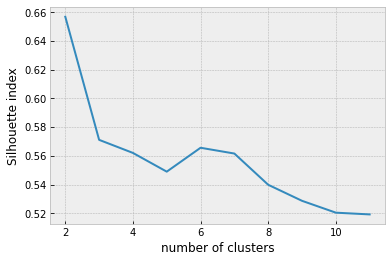

In [46]:
silhouette_coefficients = []
for i in range (2,12):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df)
    s_score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(s_score)

plt.plot(range(2,12), silhouette_coefficients)
#plt.xtciks(range(2,12))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette index")
plt.show()

In [68]:
km= KMeans(n_clusters=i)
Y_pred =km.fit_predict(X)
Y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [69]:
rand_score(Y,Y_pred)

0.670285025074589

0.670285025074589
0.718656763791024
0.6961213737065955
0.7164984447406844
0.7096426077572526
0.6959309337903892
0.6936456547959119
0.6850123785945534
0.6892655367231638
0.6806957404938742


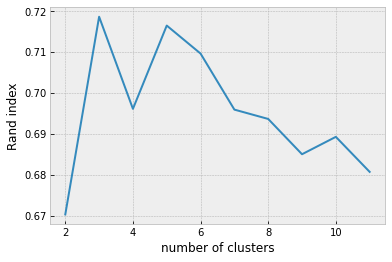

In [84]:
rand_coefficients = []
for i in range (2,12):
    km = KMeans(n_clusters=i)
    Y_pred =km.fit_predict(X)
    r_score = rand_score(Y,Y_pred)
    rand_coefficients.append(r_score)
    print(r_score)
plt.plot(range(2,12), rand_coefficients)
#plt.xtciks(range(2,12))
plt.xlabel("number of clusters")
plt.ylabel("Rand index")
plt.show()

# The Values for Silhouette index and Rand index meet at 2 and the value for Silhouette index is always start from 2 which is usually highest for Silhouette. However, we choose the next highest value after 2 that is 3. So, K should be 3 K=3

2. (8.5 points) For the *optimal* value of $k$ found in the previous question, 
predict the clustering labels. Compute the silhouette index and the rand index for the predicted labels.

# predicted labels

In [116]:
#predicted labels
km= KMeans(n_clusters=3)
Y_pred =km.fit_predict(X)
Y_pred


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

# rand score


In [117]:
rand_score(Y,Y_pred)

0.718656763791024

# Silhouette Score

In [118]:
print("For cluster: {}, the silhouette score is: {}" .format(i,score))
    

For cluster: 0, the silhouette score is: 0.517282066321034


---

# Problem 2 (15 points)

The starter code below is an incomplete implementation of the EM algorithm to optimize a Gaussian Mixture Model data likelihood.

In this problem, you will complete the provided code by filling in the empty slots (do not use any library or online implementations).

In [9]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def EM_GaussianMixture(X, NumComponents, MaximumNumberOfIterations=100, DiffThresh=1e-4, display=False):
    '''This function implements the EM algorithm for a Gaussian Mixture Model
    
    Input:
    X - n-d array of size N-by-D (feature matrix).
    NumComponents - integer (>0). Number of Gaussian components.
    MaximumNumberOfIterations - integer (>0). Maximum number of EM steps or iterations.
    DiffThresh - float (>=0). Convergence criteria measuring difference between consecutive point estimators.
    
    Output:
    Means - n-d array of size (NumComponents)x(D). Estimated Gaussian means.
    Sigs - n-d array of size (D)x(D)x(NumComponents). Estimated covariance matrices.
    Ps - n-d array of size (NumComponents)x1. Estimated probability contribution for each mixture (pis).
    pZ_X - n-darray of size (N)x(NumComponents). Estimated membership probabilities for each data point in each component, P(zi|xi).'''
    
    # Size of the input data: N number of points, D features
    N, D = X.shape

    # Initialize Parameters of each Component K
    Means = np.zeros((NumComponents,D))
    Sigs = np.zeros(((D, D, NumComponents)))
    Ps = np.zeros(NumComponents)
    for i in range(NumComponents):
        rVal = np.random.uniform(0,1)
        Means[i,:] = X[max(1,round(N*rVal)),:]
        Sigs[:,:,i] = 1*np.eye(D)
        Ps[i] = 1/NumComponents

    # E-Step Solve for p(z | x, Theta(t)) = Cik
    pZ_X = np.zeros((N,NumComponents))
    for k in range(NumComponents):
        # Assign each point to a (multivariate) Gaussian component with probability pi(k)
        pZ_X[:,k] = stats.multivariate_normal.pdf(X, mean = Means[k,:],cov = Sigs[:,:,k])
# COMPLETE THIS LINE
    pZ_X =  pZ_X / pZ_X.sum(axis=1).reshape(-1, 1)
# COMPLETE THIS LINE

    Diff = np.inf
    NumberIterations = 1
    while Diff > DiffThresh and NumberIterations < MaximumNumberOfIterations:
        ## M-step: Update Means, Sigs, Ps
        MeansOld = Means.copy()
        SigsOld = Sigs.copy()
        PsOld = Ps.copy()
        for k in range(NumComponents):
            ## Complete M-step: Update parameters
            #Means
            Means[k,:] = np.sum(X * pZ_X[:, k, np.newaxis], axis=0) /sum(pZ_X[:,k]) # COMPLETE THIS LINE

            #Sigs
            xDiff = X-MeansOld[k,:]            
            J = np.zeros((D,D))
            for i in range(N):
                J = J + pZ_X[i,k]*np.outer(xDiff[i,:], xDiff[i,:])
            Sigs[:,:,k] = J / sum(pZ_X[:,k])

            #Ps
            Ps[k] =sum(pZ_X[:,k])/N # COMPLETE THIS LINE

        ## E-step: Solve for p(z | x, Theta(t))
        # Complete E-step
        for k in range(NumComponents):
            # Assign each point to a Gaussian component with probability pi(k)
            pZ_X[:,k] = stats.multivariate_normal.pdf(X, mean = Means[k,:],cov = Sigs[:,:,k])# COMPLETE THIS LINE
            pZ_X = pZ_X / pZ_X.sum(axis=1).reshape(-1, 1)# COMPLETE THIS LINE

            Diff = sum(sum(abs(MeansOld - Means))) + sum(sum(sum(abs(SigsOld - Sigs)))) + sum(abs(PsOld - Ps))
        if display:
            print('t = ',NumberIterations,': \t', Diff)
        NumberIterations = NumberIterations + 1
    return Means, Sigs, Ps, pZ_X

---

# Problem 3 (15 points)

Using your code in problem 3, determine the mixture proportion, mean and (diagonal) covariance associated with each of the mixture component in the data contained in ```mixture.txt```.

In your solution include:

* a plot where each data point is color-coded by their weight responsabilities (you have been provided with the plotting script).

* a plot where each data point is color-coded by their cluster membership.

Answer the following questions:

1. How many mixture components are found in the data?

2. How did you determine this?

3. What did you estimate for the mixture components, means and covariances associated with each mixture component?

t =  1 : 	 5.50887651386564
t =  2 : 	 1.9062741940275825
t =  3 : 	 0.9192521736309165
t =  4 : 	 0.8069591206859948
t =  5 : 	 0.8517933497642869
t =  6 : 	 0.8261922960810288
t =  7 : 	 0.6776629465253963
t =  8 : 	 0.5827638797889261
t =  9 : 	 0.4429739919468554
t =  10 : 	 0.17230589170934718
t =  11 : 	 0.07849971148552429
EM Algorithm. # Components: 3
---------------------
Component 1
Estimated Means
[1.35340437 1.703535  ]
Estimated Covariances
[[ 0.5998532  -0.16578877]
 [-0.16578877  0.4163435 ]]
Estimated Weights
0.38095438675042337
---------------------
Component 2
Estimated Means
[0.38853821 0.97293364]
Estimated Covariances
[[ 0.10354639 -0.00782533]
 [-0.00782533  0.05086465]]
Estimated Weights
0.3165014494898429
---------------------
Component 3
Estimated Means
[2.46968197 2.3930197 ]
Estimated Covariances
[[0.05043126 0.01643878]
 [0.01643878 0.09413715]]
Estimated Weights
0.302544163759734
---------------------


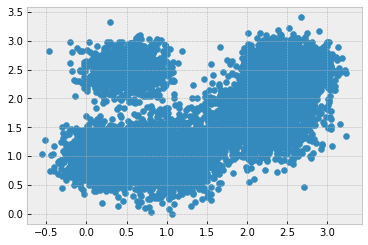

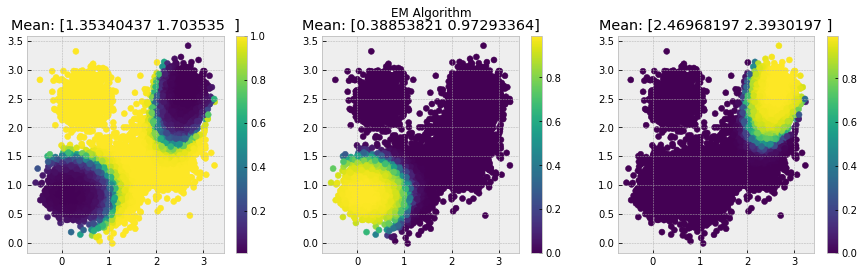

In [58]:
## Load Data
import numpy as np
X = np.loadtxt('mixture.txt')
plt.scatter(X[:,0],X[:,1]);

## Set number of components
NumComponents = 3# COMPLETE THIS LINE
EM_Means, EM_Sigs, EM_Ps, pZ_X = EM_GaussianMixture(X, NumComponents,50,0.1, True)

print('EM Algorithm. # Components: ' + str(NumComponents))
print('---------------------')
for i in range(NumComponents):
    print('Component '+str(i+1))
    print('Estimated Means')
    print(EM_Means[i,:])
    print('Estimated Covariances')
    print(EM_Sigs[:,:,i])
    print('Estimated Weights')
    print(EM_Ps[i])
    print('---------------------')
    
fig = plt.figure(figsize=(15, 4))
plt.suptitle('EM Algorithm')
for i in range(NumComponents):
    ax = fig.add_subplot(1,NumComponents,i+1)
    p1 = ax.scatter(X[:,0], X[:,1], c=pZ_X[:,i]) 
    ax.set_title('Mean: '+ str(EM_Means[i,:]))
    fig.colorbar(p1, ax=ax);

# Answer 1- Their are Three mixture Components in the data.

# Answer 2- while obversing the graph and running the code multiple times it's been show in the plot that there are 3 components.

# Answer 3- 

In [22]:
print('EM Algorithm. # Components: ' + str(NumComponents))
print('---------------------')
for i in range(NumComponents):
    print('Component '+str(i+1))
    print('Estimated Means')
    print(EM_Means[i,:])
    print('Estimated Covariances')
    print(EM_Sigs[:,:,i])
    print('Estimated Weights')
    print(EM_Ps[i])
    print('---------------------')

EM Algorithm. # Components: 3
---------------------
Component 1
Estimated Means
[1.96789645 1.62980531]
Estimated Covariances
[[0.38966548 0.27067272]
 [0.27067272 0.34867612]]
Estimated Weights
0.4127570203506778
---------------------
Component 2
Estimated Means
[1.68739934 2.53977323]
Estimated Covariances
[[0.96964941 0.03273516]
 [0.03273516 0.04050895]]
Estimated Weights
0.2717854060044223
---------------------
Component 3
Estimated Means
[0.36414569 1.00777831]
Estimated Covariances
[[0.09203151 0.00118408]
 [0.00118408 0.05085991]]
Estimated Weights
0.3154575736448981
---------------------


___